In [1]:
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X= iris.data
y= iris.target
dist_matrix = cdist(X,X)

silhouette_coefficient:

In [3]:
import numpy as np
from scipy.spatial.distance import cdist 
dist_matrix = cdist(X, X)
a = np.zeros(X.shape[0])
for i in np.unique(y):
    cluster_i = X[y == i]
    a[y == i] = np.mean(dist_matrix[y == i][:,y == i], axis=1)
    b = np.zeros(X.shape[0])
    for i in np.unique(y):
        for j in np.unique(y):
            if i != j:
                cluster_j = X[y == j]
                b[y == i] += np.mean(dist_matrix[y == i][:, y == j], axis=1)
        b[y == i] /= np.sum(y == i)
    s = (b - a) / np.maximum(a, b)
    sc = np.mean(s)
print("Silhouette coefficient:",sc)


Silhouette coefficient: -0.8399654524285572


calinski_harabasz(CS):


In [4]:
import numpy as np
from scipy.spatial.distance import cdist
dist_matrix = cdist(X, X)
centers = np.zeros((len(np.unique(y)), X.shape[1]))
for i, label in enumerate(np.unique(y)):
    centers[i] = np.mean(X[y ==y], axis=0)
    within_cluster_sum_sq = np.zeros(len(np.unique(y)))
    for i, label in enumerate(np.unique(y)):
        cluster_i = X[y == label]
        within_cluster_sum_sq[i] = np.sum((cluster_i - centers[i])**2)
    between_cluster_sum_sq = np.sum((centers - np.mean(X, axis=0))**2) * (len(X) - len(np.unique(y)))
    ch = between_cluster_sum_sq / within_cluster_sum_sq.sum() * (len(X) - len(np.unique(y))) / (len(np.unique(y)) - 1)
print("Calinski-Harabasz Index:", ch)


Calinski-Harabasz Index: 0.0


Dunn Index (DI):

In [5]:

import numpy as np
from scipy.spatial.distance import cdist
min_inter_cluster_distances = np.min(dist_matrix[y[:, np.newaxis] != y])
max_intra_cluster_diameters = np.zeros(np.max(y) + 1)
for i in range(len(max_intra_cluster_diameters)):
        max_intra_cluster_diameters[i] = np.max(dist_matrix[y == i][:, y == i])
di = np.min(min_inter_cluster_distances) / np.max(max_intra_cluster_diameters)  
print("Dunn Index:",di)       

Dunn Index: 0.05848053214719304


FCM

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


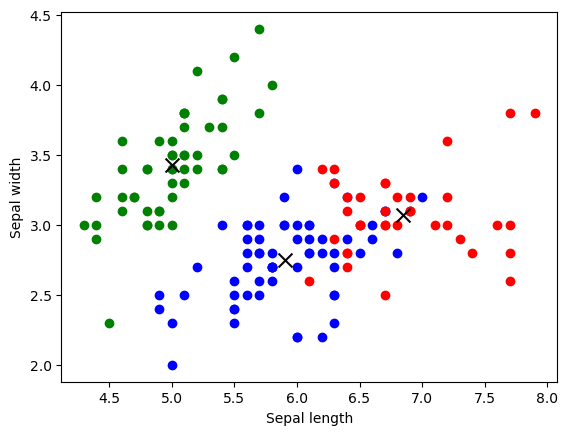

In [7]:
n_clusters = 3
fcm = KMeans(n_clusters=n_clusters)
fcm.fit(X)
centroids = fcm.cluster_centers_
fcm_labels = fcm.predict(X)
colors = ['b', 'g', 'r', 'c', 'm']
for i in range(n_clusters):
    plt.scatter(X[:, 0][fcm_labels==i], X[:, 1][fcm_labels==i], c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='#050505')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

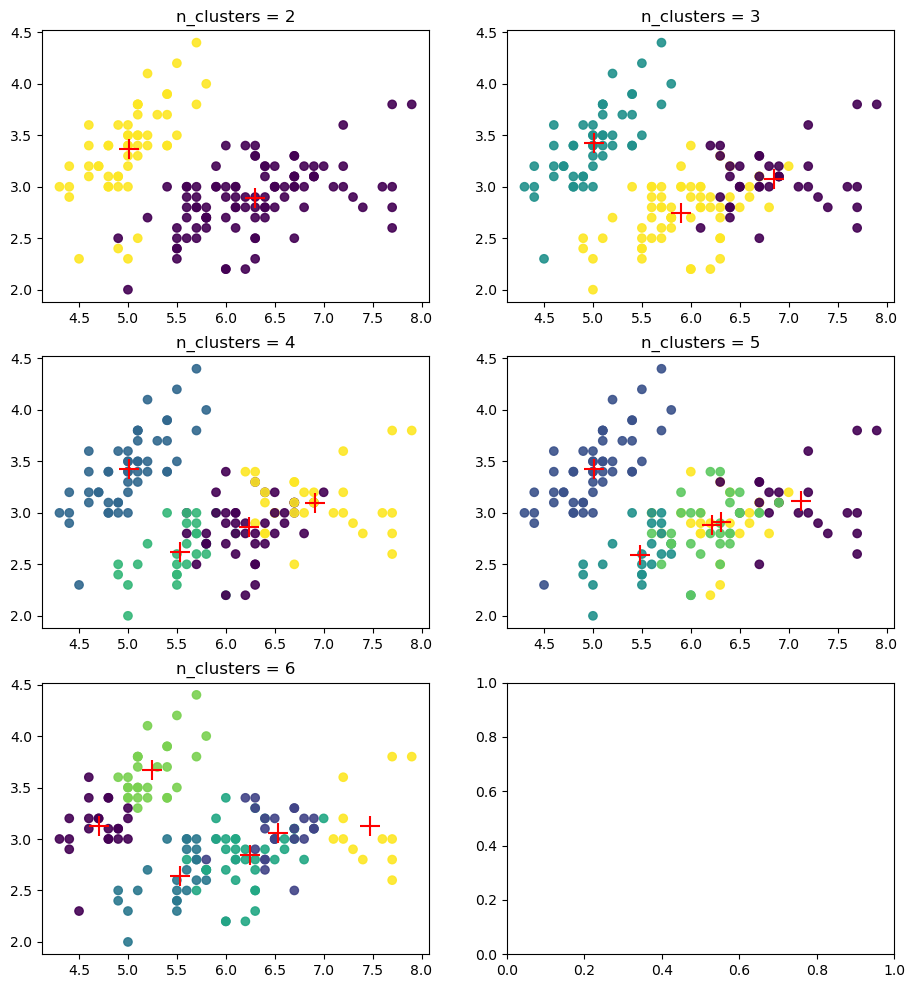

In [14]:
n_clusters_list = [2, 3, 4, 5, 6]
models = list()
for n_clusters in n_clusters_list:
    fcm = KMeans(n_clusters=n_clusters,n_init='auto')
    fcm.fit(X)
    models.append(fcm)
    num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,12))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    fcm_centers = model.cluster_centers_
    fcm_labels = model.predict(X)
    axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.9)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=200, c='r')
    axe.set_title(f'n_clusters = {n_clusters}')
plt.show()

VAT & iVAT:

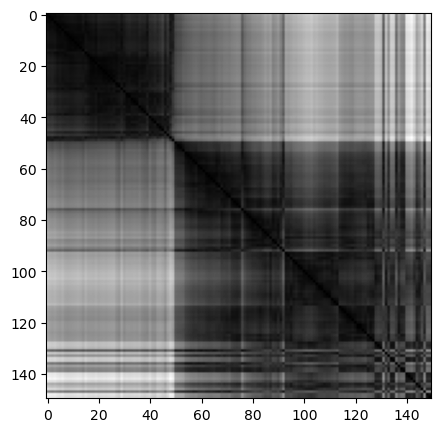

In [16]:
from visual_assessment_of_tendency import vat
vat(X,figure_size=(5,5))

# ivat

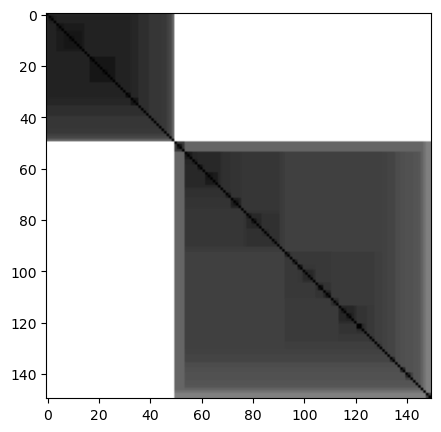

In [17]:
from visual_assessment_of_tendency import ivat
ivat(X,figure_size=(5,5))